In [1]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime
import time
import csv
from loadex04 import load_env_ex04

In [2]:

weather_conditions = {
    1: "ท้องฟ้าแจ่มใส (Clear)",
    2: "มีเมฆบางส่วน (Partly cloudy)",
    3: "เมฆเป็นส่วนมาก (Cloudy)",
    4: "มีเมฆมาก (Overcast)",
    5: "ฝนตกเล็กน้อย (Light rain)",
    6: "ฝนปานกลาง (Moderate rain)",
    7: "ฝนตกหนัก (Heavy rain)",
    8: "ฝนฟ้าคะนอง (Thunderstorm)",
    9: "อากาศหนาวจัด (Very cold)",
    10: "อากาศหนาว (Cold)",
    11: "อากาศเย็น (Cool)",
    12: "อากาศร้อนจัด (Very hot)"
}
token = load_env_ex04()
headers = {
    'accept': "application/json",
    'authorization': f"Bearer {token}"
}

times = []
rhum = []  # Relative Humidity
temps = []  # Temperature
conditions = []  # Weather Conditions


In [3]:
url = "https://data.tmd.go.th/nwpapi/v1/forecast/location/hourly/place"


querystring = {"province":u"ชุมพร", "amphoe":u"", "tambon" : u"",
               "fields":"tc,rh,cond", 
               "date":datetime.now().strftime("%Y-%m-%d"), 
               "hour":"8", 
               "duration":"36"}

In [7]:
response = requests.request("GET", url, headers=headers, params=querystring)
if response.status_code == 200:
    data = response.json()  # แปลง response เป็น JSON โดยตรง
    weather_data = {}
    # ดึงข้อมูลตามที่ต้องการ
    for i in range(len(data["WeatherForecasts"])):
        forecasts = data["WeatherForecasts"][i]["forecasts"]
        location = data["WeatherForecasts"][i]["location"]["province"]

        if location not in weather_data:
            weather_data[location] = {'times': [], 'rhum': [], 'temps': [], 'conditions': []}

        for forecast in forecasts:
            time = forecast["time"]
            rh = forecast["data"]["rh"]
            tc = forecast["data"]["tc"]
            cond = forecast["data"]["cond"]

            # Append to location-specific lists
            weather_data[location]['times'].append(datetime.fromisoformat(time[:-6]))  # Convert to datetime, ignoring timezone
            weather_data[location]['rhum'].append(rh)
            weather_data[location]['temps'].append(tc)
            weather_data[location]['conditions'].append(cond)

            if cond in weather_conditions:
                print(f"จังหวัด {location} Time: {time}, Humidity: {rh}%, Temperature: {tc}°C สภาพอากาศคือ: {weather_conditions[cond]}")

else:
    print("Failed to retrieve data:", response.status_code)

จังหวัด ชุมพร Time: 2025-02-06T08:00:00+07:00, Humidity: 99.72%, Temperature: 20.47°C สภาพอากาศคือ: เมฆเป็นส่วนมาก (Cloudy)
จังหวัด ชุมพร Time: 2025-02-06T09:00:00+07:00, Humidity: 98.77%, Temperature: 19.79°C สภาพอากาศคือ: เมฆเป็นส่วนมาก (Cloudy)
จังหวัด ชุมพร Time: 2025-02-06T10:00:00+07:00, Humidity: 96.39%, Temperature: 22.68°C สภาพอากาศคือ: เมฆเป็นส่วนมาก (Cloudy)
จังหวัด ชุมพร Time: 2025-02-06T11:00:00+07:00, Humidity: 78.98%, Temperature: 27.85°C สภาพอากาศคือ: เมฆเป็นส่วนมาก (Cloudy)
จังหวัด ชุมพร Time: 2025-02-06T12:00:00+07:00, Humidity: 66.03%, Temperature: 29.95°C สภาพอากาศคือ: เมฆเป็นส่วนมาก (Cloudy)
จังหวัด ชุมพร Time: 2025-02-06T13:00:00+07:00, Humidity: 73.52%, Temperature: 27.76°C สภาพอากาศคือ: มีเมฆบางส่วน (Partly cloudy)
จังหวัด ชุมพร Time: 2025-02-06T14:00:00+07:00, Humidity: 75.35%, Temperature: 27.96°C สภาพอากาศคือ: ท้องฟ้าแจ่มใส (Clear)
จังหวัด ชุมพร Time: 2025-02-06T15:00:00+07:00, Humidity: 73.2%, Temperature: 27.92°C สภาพอากาศคือ: ท้องฟ้าแจ่มใส (Clear)
จังหวัด 

จังหวัด ชุมพร


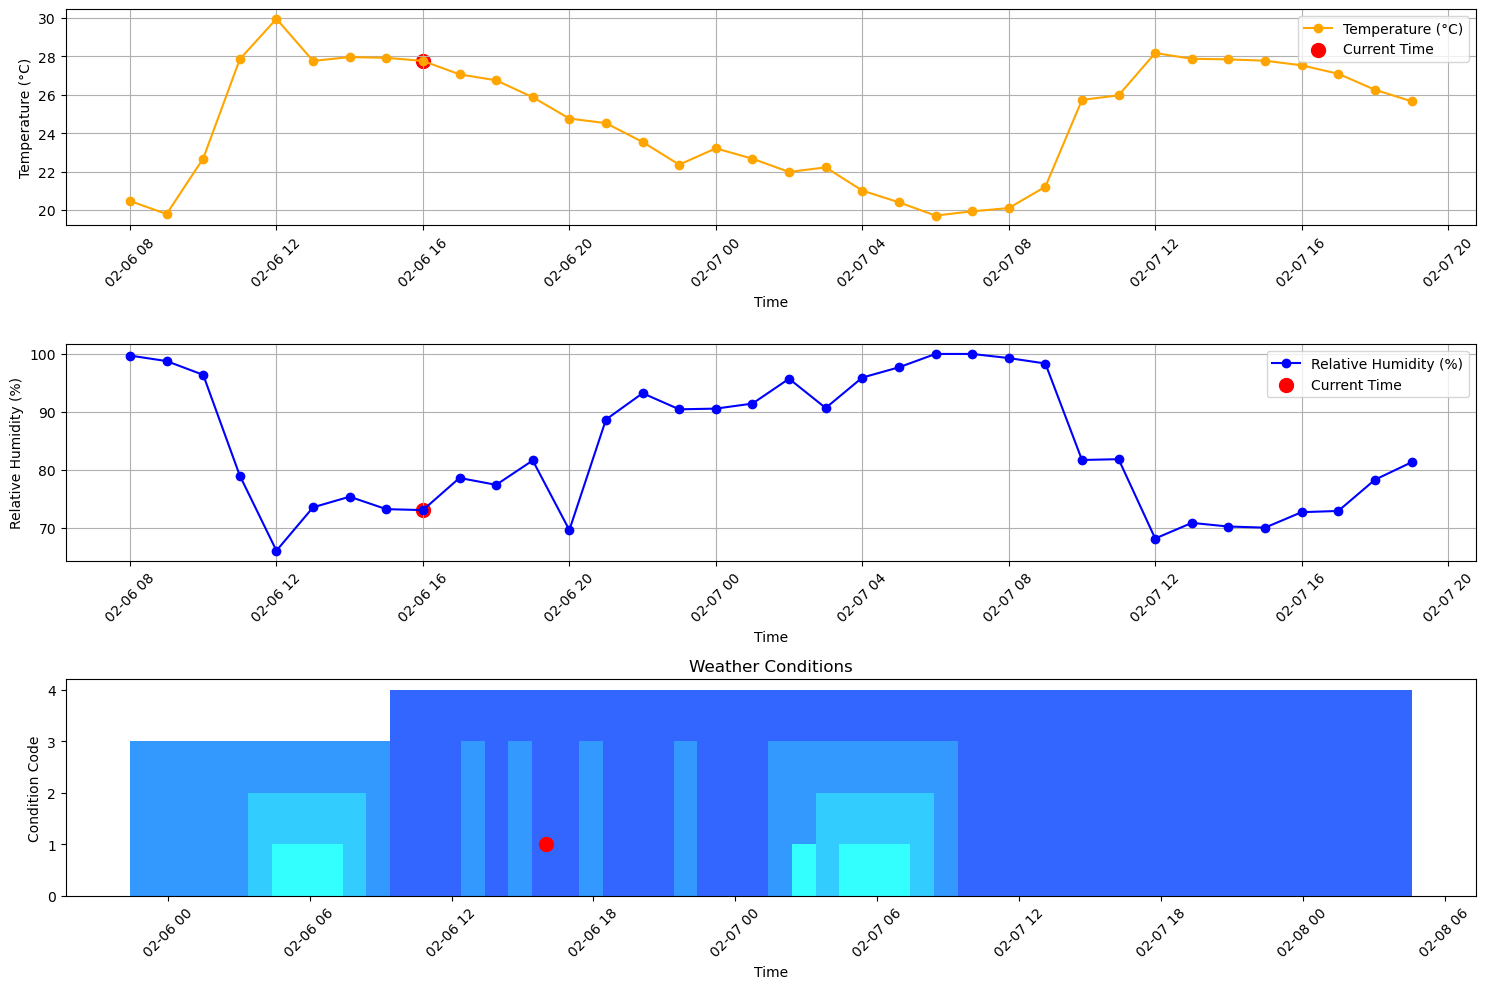

In [8]:
import numpy as np

current_time = datetime.now()

for location, data in weather_data.items():
    plt.figure(figsize=(15, 10))
    print(f"จังหวัด {location}")
    # Plot temperature
    plt.subplot(3, 1, 1)
    plt.plot(data['times'], data['temps'], marker='o', label='Temperature (°C)', color='orange')

    # Highlight the closest time to current_time
    time_diff = np.abs(np.array(data['times']) - current_time)
    closest_index = time_diff.argmin()  # Get the index of the closest time
    plt.scatter(
        [data['times'][closest_index]],
        [data['temps'][closest_index]],
        color='red',  # Highlight in red
        s=100,        # Size of the marker
        label='Current Time'
    )

    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()

    # Plot humidity
    plt.subplot(3, 1, 2)
    plt.plot(data['times'], data['rhum'], marker='o', label='Relative Humidity (%)', color='blue')

    # Highlight the closest time to current_time for humidity
    plt.scatter(
        [data['times'][closest_index]],
        [data['rhum'][closest_index]],
        color='red',  # Highlight in red
        s=100,        # Size of the marker
        label='Current Time'
    )

    plt.xlabel('Time')
    plt.ylabel('Relative Humidity (%)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    custom_colors = ['#33FFFF', '#33CCFF', '#3399FF', '#3366FF', '#3333FF', 
                 '#3300FF', '#3300CC', '#330099', '#330066', '#330033', 
                 '#330000', '#FF0000']
    # Plot weather conditions
    plt.subplot(3, 1, 3)
    plt.bar(data['times'], data['conditions'], color=[custom_colors[i - 1] for i in data['conditions']])
    plt.title('Weather Conditions')
    plt.xlabel('Time')
    plt.ylabel('Condition Code')
    plt.xticks(rotation=45)

    # Highlight the closest time to current_time for conditions
    plt.scatter(
        [data['times'][closest_index]],
        [data["conditions"][closest_index]],
        color='red',  # Highlight in red
        s=100,        # Size of the marker
        label='Current Time'
    )

    # Show the plots for each location
    plt.tight_layout()
    plt.show()